In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
strRoar1 = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC ROAR Practice 1.csv'
strRoar2 = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC ROAR Practice 2.csv'
strRoar3 = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC ROAR Practice 3.csv'
strRoar4 = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC ROAR Practice 4.csv'
strRoarQ = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC ROAR Qualifying.csv'

strQ = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC Daytona Qualifying.csv'
strR = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC Daytona Race.csv'


dfR1 = pd.read_csv(strRoar1)
dfR2 = pd.read_csv(strRoar2)
dfR3 = pd.read_csv(strRoar3)
dfR4 = pd.read_csv(strRoar4)
dfRQ = pd.read_csv(strRoarQ)

dfQ = pd.read_csv(strQ)
dfR = pd.read_csv(strR)

In [22]:
# Do some data conditioning to get the lap times in the right format


dfR1 = dfR1.assign(dtLapTime = pd.to_datetime('0:0:' + dfR1['Lap Time'] + '0', 
                               exact=False, errors='ignore', format = "%H:%M:%S.%f").apply(lambda x: x.time()))
dfR1 = dfR1.assign(fLapTime = dfR1.dtLapTime.apply(lambda x: ((x.hour*60+x.minute)*60+x.second)*1000000+x.microsecond)/1000000)

In [24]:
#Function to fix the time (string)
def fixTime(df):
    '''This function takes the dataframe as an argument and 
    converts the string Lap Time column to be a datetime
    and then converts the datetime column to be a float.
    The function then returns the dataframe with those two
    columns appended to the right'''
    
    # TODO: Check to make sure that the 'Lap Time' column
    #       exists.
    # TODO: Check to make sure that the 'Lap Time' column
    #       is the right format
    
    df = df.assign(dtLapTime = pd.to_datetime('0:0:' + df['Lap Time'] + '0',
                                             exact = False, errors = 'ignore',
                                             format = "%H:%M:%S.%f").apply(lambda x: x.time()))
    df = df.assign(fLapTime = df.dtLapTime.apply(lambda x: ((x.hour * 60 + x.minute) * 60 + x.second) * 1000000 + x.microsecond) / 1000000)
    return df

In [27]:
dfR2 = fixTime(dfR2)
dfR3 = fixTime(dfR3)
dfR4 = fixTime(dfR4)

In [30]:
dfR2[['Lap Time', 'dtLapTime', 'fLapTime']]

,Lap Time,dtLapTime,fLapTime
0,2:00.034,00:02:00.034000,120.034
1,2:02.765,00:02:02.765000,122.765
2,2:07.999,00:02:07.999000,127.999
3,2:08.895,00:02:08.895000,128.895
4,2:19.004,00:02:19.004000,139.004
5,2:20.829,00:02:20.829000,140.829
6,2:21.117,00:02:21.117000,141.117
7,2:21.691,00:02:21.691000,141.691
8,2:24.908,00:02:24.908000,144.908
9,2:25.853,00:02:25.853000,145.853


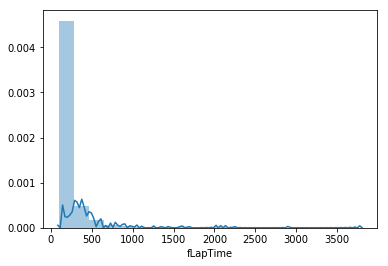

In [23]:
sns.distplot(dfR1['fLapTime'], bins = 20)
